# Housing Price Prediction

**Lizie Michel Curren**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The goal of the project is to accurately predict housing prices using Linear regression model. To achieve this we are going to use python data analysis built in functions to import, analyze and repair the raw datasets and find the most highly correlated independent numerical variables.
After successfully run the linear regression analysis, it was found that going from five to ten independent variables increase the prediction accuracy from 83% and 74% to 85% and 85% on the two datasets. Based on this analysis the more data we feed in our model the higher the percentage of accuracy predicting SalePrice.

[Back to top](#Index)


## 1. Introduction

The purpose of the project is to improve the performance of the housing price prediction model developed by the instructor in class. Two datasets were provided, one for development and one for testing. The process starts by importing all the necessary libraries followed by importing the data into a dataframe using the pandas python library. Once the data is imported we use various python functions to visualize and analyze the data. Python code was implemented to drop attributes with less than 30% null values. Categorical values were excluded to utilize numerical attributes only for the analysis. Small amount of Null values were repaired. 

Once our working dataframe is ready, a matrix with correlation coefficient was created and the heatmap to identify the values most correlated with SalePrice. The Least-Squares Linear Regression method was implemented. Three groups of dataset were modeled. The dataframe with more correlated coefficients were used to created the housing price prediction model that leads to a more accurate prediction compared the one presented during the class. 

[Back to top](#Index)

## 2. The Data

There are two datasets used to predict housing prices using linear regression. The two datasets are provided in cvs files. And one text file with a description of the data for better information.

1. `houseSmallData.cvs`: This dataset contains columns that represent the independent variable `X`. The house data describes housing features such as lot size in square feet, year built and year sold in years, the type of road access, the flatness of the property, number of bedrooms and the distance from the downtown. *houseSmallData.csv* will be used to predict the dependent variable `Y`(SalePrice) of each house based on the multiple factors.
2. `jtest.csv`: This dataset contains test data with the same attributes of the house data. The test data will be used to predict housing prices and compared against housing data prediction. The shape of test data is same training data 100 rows and 82 columns.
3. `data_description.txt`: The data_description file contains a detailed description of the data.


[Back to top](#Index)

### 2.1 Import the Data

Importing the necessary libraries and the data for the project.


#### 2.1.1 Importing the neccesary libraries

In [210]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as linear_model

#### 2.1.2 Reading housing data from a cvs file to a dataframe
Used also function head(5) to visualize the first 5 rows from the dataframe and see if importing to a dataframe was succesfull

In [211]:
df_data = pd.read_csv('~/Downloads/houseSmallData.csv', index_col=0)
df_data.head(5) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 2.1.3 Reading test data from a csv file to a dataframe

In [212]:
df_test = pd.read_csv('~/Downloads/jtest.csv', index_col=0)
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


#### 2.1.4 Reading the data description file from a txt format
This file helps to understand the data better by providing a data description.

In [213]:
# Making sure the 'data_description.txt' file exists
os.listdir()

# Making sure I am in the right directory
os.getcwd()

# Calling dir
os.chdir('/Users/lizie/Downloads')
file = open('/Users/lizie/Downloads/data_description.txt', 'r')
print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

#### 2.2.1 Understanding the data. What type of data do we have numerical or categorical data?
The first and last 5 rows will be displayed using function head() and tail(). As we can see below lines the data is starting in 0 and ending in 99 rows. There is a total of 100 entries. There are numerical and categorical datatypes. For the prediction we most likely will be using only numerical data so we will have to drop the categorical values such a MSZoning, Street, LotShape, etc

In [16]:
df_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [214]:
df_data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950


#### 2.2.2 Looking at the shape of the data to get familiar with number of columns and rows. 
The housing dataset has 100 rows and 82 columns. Let's print the header's name to get familiar with it. Using a for loop to print all the headers. 

In [215]:
df_data.shape

(100, 81)

In [216]:
# Three deferent ways to look a the headers

# print(df_data.columns.tolist())
# print([col for col in df_data])
df_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### 2.2.3 Checking the size of the housing dataset with info(). This function will retrieve number of entries for each column, datatypes and null counts. 


In [217]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   MSSubClass     100 non-null    int64  
 2   MSZoning       100 non-null    object 
 3   LotFrontage    86 non-null     float64
 4   LotArea        100 non-null    int64  
 5   Street         100 non-null    object 
 6   Alley          6 non-null      object 
 7   LotShape       100 non-null    object 
 8   LandContour    100 non-null    object 
 9   Utilities      100 non-null    object 
 10  LotConfig      100 non-null    object 
 11  LandSlope      100 non-null    object 
 12  Neighborhood   100 non-null    object 
 13  Condition1     100 non-null    object 
 14  Condition2     100 non-null    object 
 15  BldgType       100 non-null    object 
 16  HouseStyle     100 non-null    object 
 17  OverallQual    100 non-null    int64  
 18  OverallCond

Lets look closer at nulls only. We should not analyze the ones that have lots of Null values. We can see from the top 20 attributes with null values, PoolIQC, Alley, MiscFeature, Fence  and FireplaceQu are the ones that have more than 30% Null values.

In [218]:
nulls = pd.DataFrame(df_data.isnull().sum().sort_values(ascending=False))[0:20]
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
FireplaceQu,54
LotFrontage,14
GarageCond,6
GarageType,6
GarageYrBlt,6
GarageFinish,6


#### 2.2.4 Getting a summary of numerical attributes
Function describe() provides a summary of the numerical values. From below lines we can see count of each attribute excluding empty or Null values, for example PoolIQC attribute it looks like the count is zero so this is an indicator that PoolIQC is an attribute that needs to be excluded or dropped from the analysis. Also, PoolArea attribute the count seems correct but the other metrics such as mean, std, min and max are equal to zero.

In [219]:
df_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,100.000000,100.000000,86.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.0,0.0,100.000000,100.000000,100.00000,100.000000
mean,50.500000,52.000000,71.406977,10115.870000,5.980000,5.50000,1971.410000,1983.920000,121.640000,454.560000,...,46.900000,24.130000,7.270000,10.160000,0.0,NaN,46.300000,6.330000,2007.90000,173820.660000
std,29.011492,42.545282,21.093840,5130.541763,1.530696,0.97959,29.373284,20.967353,213.553982,462.034922,...,59.743306,60.211019,51.518724,46.908835,0.0,NaN,153.692958,3.048613,1.35959,72236.552886
min,1.000000,20.000000,21.000000,1596.000000,3.000000,2.00000,1910.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.00000,40000.000000
25%,25.750000,20.000000,60.000000,7643.250000,5.000000,5.00000,1954.750000,1964.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.750000,2007.00000,129362.500000
50%,50.500000,45.000000,70.000000,9595.500000,6.000000,5.00000,1970.000000,1994.000000,0.000000,416.000000,...,30.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.00000,153750.000000
75%,75.250000,60.000000,84.000000,11243.250000,7.000000,6.00000,2000.250000,2003.250000,188.500000,737.500000,...,72.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.00000,207750.000000
max,100.000000,190.000000,122.000000,50271.000000,10.000000,8.00000,2009.000000,2009.000000,1115.000000,1880.000000,...,258.000000,272.000000,407.000000,291.000000,0.0,NaN,700.000000,12.000000,2010.00000,438780.000000


#### 2.2.5 Getting Distinct Count per Attribute
By getting a distinct count per attribute I am trying to identify data that does not make sense. For example if we get SalePrice equal to 1 Distinct Count, this is a clear indicator that the data is incorrect.

In [43]:
df_uLotShape = df_data.nunique().to_frame().reset_index()
df_uLotShape.columns = ['Header','DistinctCount']
df_uLotShape

,Header,DistinctCount
0,Id,100
1,MSSubClass,14
2,MSZoning,4
3,LotFrontage,44
4,LotArea,94
...,...,...
76,MoSold,12
77,YrSold,5
78,SaleType,4
79,SaleCondition,4


#### 2.2.6 Looking at SalesPrice distribution
It's important to understand the distribution of SalesPrice attribute as we are going to predict using this attribute. Follow distribution shows SalesPrice is slightly skewed to the right and the normal distribution falls between 100,000 and 300,000.

/Users/lizie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

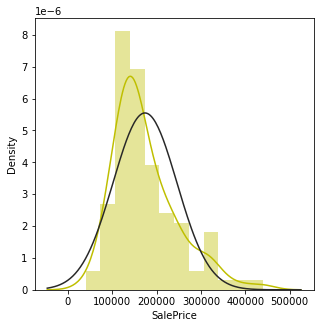

In [229]:
fig, ax = plt.subplots(figsize = (5,5))
sns.distplot(df_data['SalePrice'], color = 'y', fit = norm, ax = ax, )

#### 2.2.7 Plotting some attributes to see the relationship in a scatter plot

*SalePrice* and *YearBuilt*, it seems to be a relationship between SalePrice and YearBuilt. The data points shows the newer the house the most expensive is the sales price. Following the Linear Regression theory, the following plot shows a straight line.

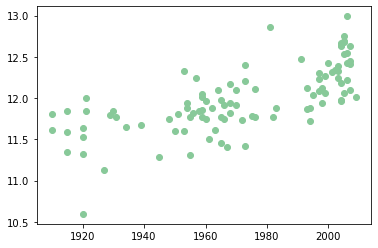

In [221]:
salePrice = df_data['SalePrice']
target = np.log(salePrice)
plt.scatter(df_data['YearBuilt'], y=target, color = '#88c999')

SalePrice does not increase with the number of fire placer. Therefore, there is not strong relationship between SalePrice and Fireplace. 

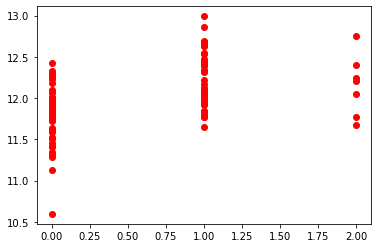

In [222]:
plt.scatter(df_data['Fireplaces'], y=target, color = 'r')

There is a strong relationship between the first floor square feet and sales price. It lookslike the bigger the square feet in the first floor the more expensive is the house. This strong relationship is also because most of the houses only have one floor.

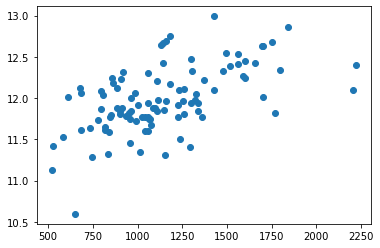

In [26]:
plt.scatter(df_data['1stFlrSF'], y=target)

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


#### 2.3.1 Identifying Attributes with Null values greater than 30%
Running the info() function could see at a glance that there are some fields like Alley, PoolQC, Fence and MiscFeature that are mostly nulls. The following python code will drop attributes filled with Null values greater than 30% columns and exclude of our analysis.

In [223]:
df_train = df_data[[column for column in df_data if df_data[column].count()/len(df_data) >= 0.3]]
del df_train['Id']
del df_train['PoolArea']
print('Dropped columns are:', end=" ")
for c in df_data.columns:
    if c not in df_train.columns:
        print(c, end=", ")
print('\n')

Dropped columns are: Id, Alley, PoolArea, PoolQC, Fence, MiscFeature, 



#### 2.3.2 Identifying numerical attributes only for the analysis

In [224]:
df_num = df_train.select_dtypes(include = ['int64', 'float64'])
df_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,12,2008,250000


Verifying if the dataframe contains only numerical values

In [225]:
list(set(df_num.dtypes.tolist()))

[dtype('int64'), dtype('float64')]

#### 2.3.3 Plotting a histogram to see the distribution of the numerical values only

Plotting the numerical attributes to see the normal distribution. From the histogram distribution we can see there are some attributes that follow the normal distribution: LotFrontage, LotArea, YearBuilt, TotalBsmtSf, 1stFlrSF, GrLivArea, GarageArea

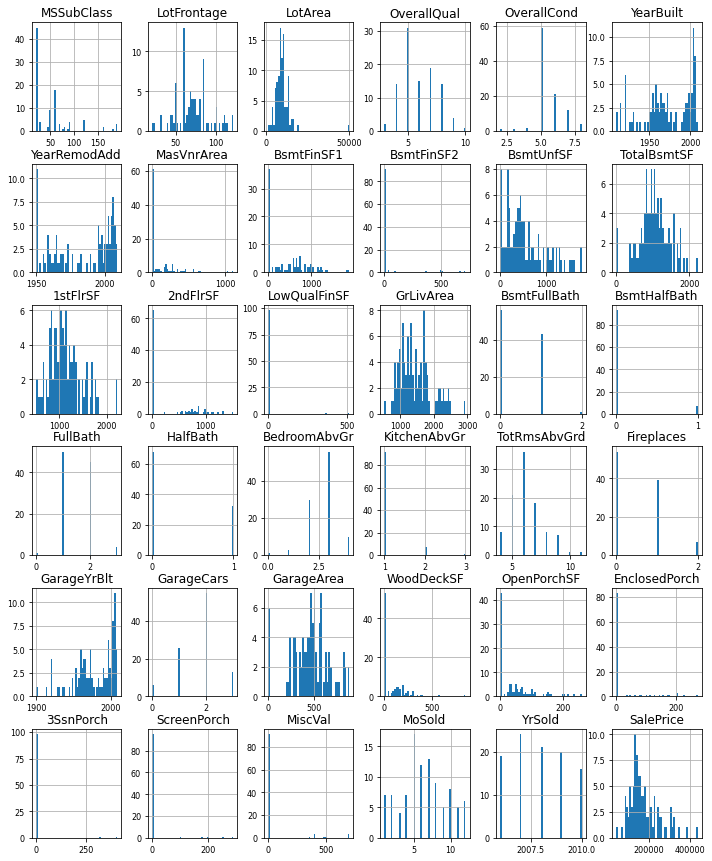

In [228]:
df_num.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8);

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

The strength of the linear association between two variables is quantified by the correlation coefficient. Given a set of observations *(X1, Y1), (X2, Y2),...(XnYn)*, the formula or computing the correlation coefficient is given by the mathematical formula:
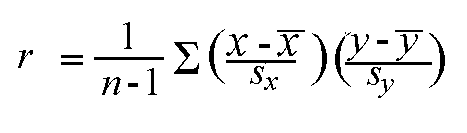

The correlation coefficient always takes a value between -1 or 1, indicating perfect correlation (all points would lie along a straight line in this case). A positive correlation indicates a positive association between the variables (increasing values in one variable correspond to increasing values in the other variable), while a negative correlation indicates a negative association between the variables(increasing values is one variable correspond to decreasing values in the other variable). A correlation value close to 0 indicates no association between the variables.

#### 2.4.1 Plotting scatterplots to see the correlation between the data
Before attempting to fit a linear model to observe the data, we should first determine whether or not there is a relationship between the variables of interest. A scatterplot helps to determine the strength of the relationship between two variables.
We often see patterns or relationship in scatterplots. When the *Y* variable tends to increase as the *X* variable increases, we say there is a positive correlation between the variables. When the *Y* variable tends to decrease as the *X* variable increases, we say there is a negative correlation between the variables. When there is no clear relationship between the two variables, we say there is no correlation between the two variables.
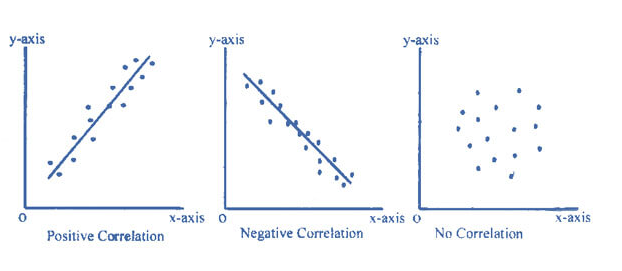

The following python codes uses a *for* loop to plot the relationship between SalePrice and the numerical attributes of housing price data also called *X* variable. From the scatterplots we can observe strong positive correlation of SalePrice with LotFrontage, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageYrBlt, GarageArea,etc. As SalePrice increases also attributes mentioned aboved are increasing and there is a line drew between them. A clear observation of no relationship is shown between SalePrice and LowQualFinSF for example.

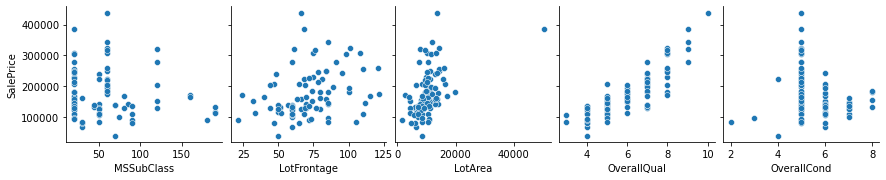

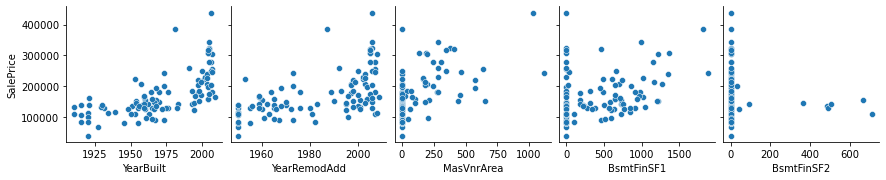

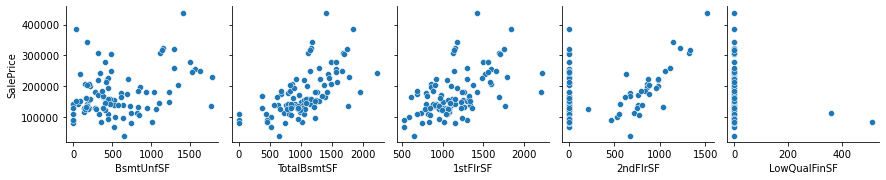

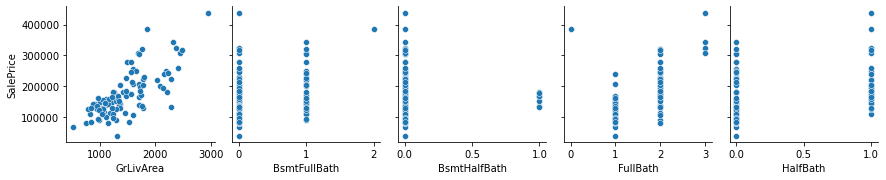

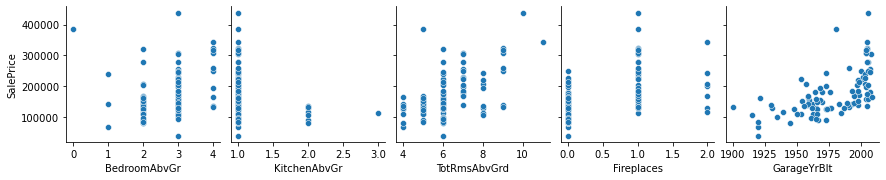

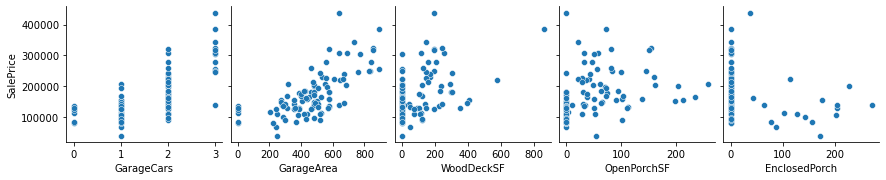

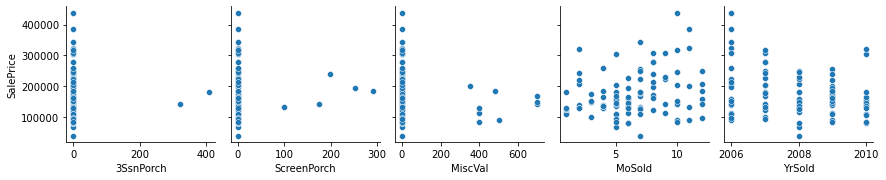

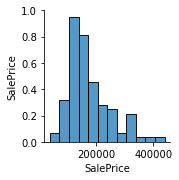

In [202]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
    x_vars=df_num.columns[i:i+5],
    y_vars=['SalePrice'])

#### 2.4.2 Defining the correlation matrix for the numerical values

After data preparation and setting the dataframe with numerical attributes only. A correlation  matrix was defined to help to understand which attributes are  better correlated with SalePrice and followed by heatmap plot using the Seaborn library. The heatmap plot helps to visualize with lighter color values with higher correlation. From the heatmap we can observed Saleprice is more correlated with OverallQual, YearBuilt, GrLivArea, GarageArea, GarageCars, GarageYrBlt.

In [110]:
corr_num = df_num.corr()
round(corr_num,2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.47,-0.33,0.05,-0.11,-0.05,0.08,0.00,-0.09,-0.09,...,-0.11,-0.11,0.09,0.06,-0.06,0.06,-0.00,0.06,0.03,-0.07
LotFrontage,-0.47,1.00,0.38,0.17,-0.21,0.25,0.10,0.20,-0.07,0.12,...,0.28,0.08,-0.06,-0.17,0.16,0.03,0.05,0.06,-0.02,0.30
LotArea,-0.33,0.38,1.00,0.34,-0.13,0.19,0.12,0.09,0.36,-0.08,...,0.38,0.52,0.09,-0.10,0.05,0.06,0.01,0.21,-0.18,0.50
OverallQual,0.05,0.17,0.34,1.00,-0.15,0.58,0.49,0.53,0.15,-0.16,...,0.71,0.34,0.29,-0.10,-0.04,0.05,-0.08,0.19,-0.25,0.86
OverallCond,-0.11,-0.21,-0.13,-0.15,1.00,-0.22,-0.03,-0.15,0.05,0.25,...,-0.12,0.08,-0.08,-0.08,-0.07,0.00,0.09,-0.25,0.14,-0.17
YearBuilt,-0.05,0.25,0.19,0.58,-0.22,1.00,0.62,0.38,0.18,-0.08,...,0.50,0.27,0.37,-0.56,0.03,0.04,-0.00,0.17,-0.17,0.66
YearRemodAdd,0.08,0.10,0.12,0.49,-0.03,0.62,1.00,0.27,0.09,-0.01,...,0.40,0.20,0.32,-0.34,-0.04,0.01,-0.12,0.18,-0.04,0.55
MasVnrArea,0.00,0.20,0.09,0.53,-0.15,0.38,0.27,1.00,0.21,-0.13,...,0.40,0.23,0.10,-0.13,0.02,0.03,-0.09,0.12,-0.06,0.57
BsmtFinSF1,-0.09,-0.07,0.36,0.15,0.05,0.18,0.09,0.21,1.00,-0.13,...,0.16,0.33,0.07,-0.22,0.04,0.07,-0.07,0.03,-0.12,0.27
BsmtFinSF2,-0.09,0.12,-0.08,-0.16,0.25,-0.08,-0.01,-0.13,-0.13,1.00,...,-0.08,0.13,-0.10,-0.10,-0.04,-0.06,-0.07,-0.07,0.21,-0.14


#### 2.4.3 Plotting correlation Matrix to a heat map
Once the correlation matrix is defined it can be passed to Seaborn's heatmap() method to create a heatmap(or headgrid). The idea is that they replace with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values of **r**. This type of visualization can make it much easier to spot linear relationship between variables than a table of numbers.

<AxesSubplot:>

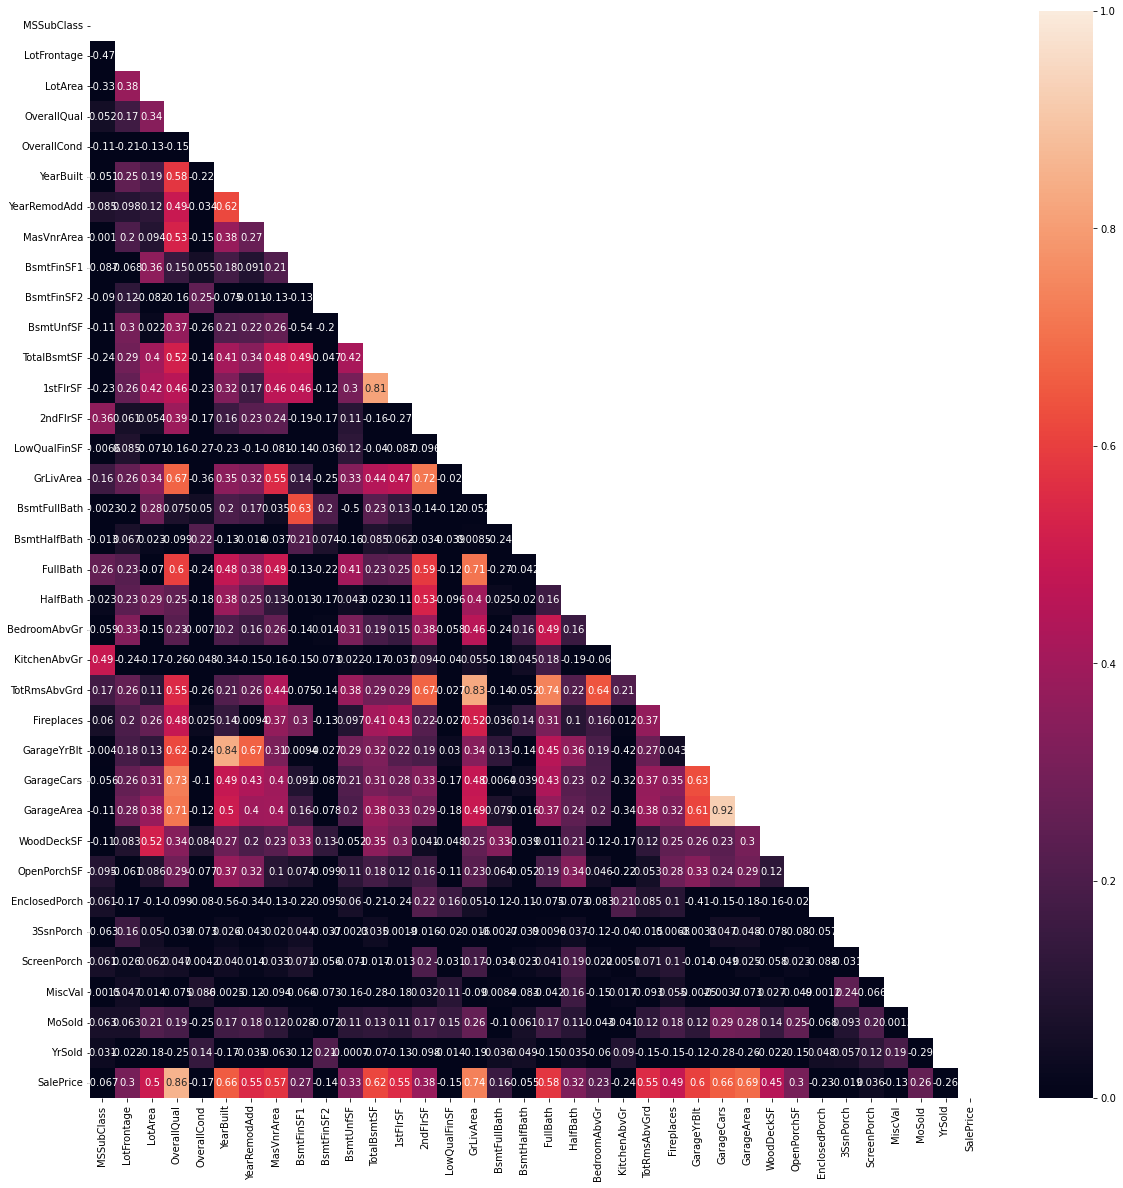

In [109]:
f, ax = plt.subplots(figsize=(20,20))
mask = np.triu(np.ones_like(corr_num, dtype = bool))
sns.heatmap(corr_num, vmin=0, vmax=1, annot=True, mask=mask)

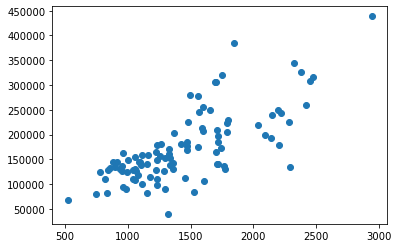

In [145]:
# SalePrice is well correlated with GrLivArea
plt.scatter(df_data['GrLivArea'], y=Y)

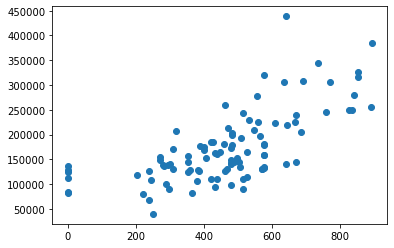

In [310]:
# SalePrice is well correlated with GarageArea
plt.scatter(df_data['GarageArea'], y=Y)

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

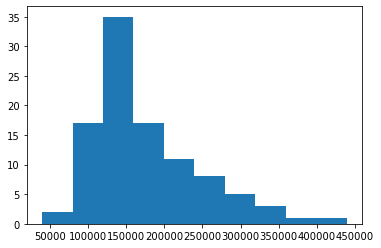

In [312]:
# SalePrice distribution slightly skewed to the right
plt.hist(Y)

1.1783462304851948

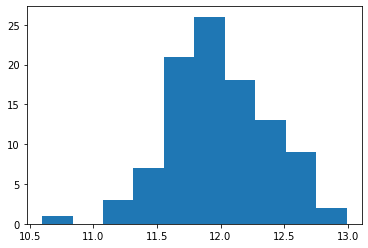

In [143]:
# Implementing log for scale we can see improvement in the SalePrice distribution.
plt.hist(np.log(Y))
Y.skew()

In [144]:
# lets take a look at the log of that and the log of that
np.log(Y).skew()

-0.09632240207755555


[Back to top](#Index)

## 3. Project Description

The exploration in the previous section determined which of the 81 columns of data were the best predictors of house prices: the ones with the highest correlation values, close to 1. Selecting the top 10 of these data points and using those variables alone to determine house price improved the performance of the housing price prediction model.

[Back to top](#Index)

### 3.1 Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

A linear regression line has an equation of the form:

                          Y = a + bX 
    
- where **X** is the explanatory variable  
- **Y** is the dependent variable 
- The slope of the line is **b** 
- **a** is the intercept(the value of *y* when *x=0*) 

With the larger dataset provided a multivariate linear regression can be generated to more accurately predict the dependent variable using multiple explanatory variables. 

The improved housing price predition model uses a multivariate Linear Regression using the least squares Linear Regression.

#### Least-Squares Regression
The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line(if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values.


[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.

#### 3.2.1 Getting the top ten more correlated attributes with SalePrice

In [274]:
strong_corr = corr_num['SalePrice'].sort_values(ascending=False)[0:11]
strong_corr

SalePrice       1.000000
OverallQual     0.855061
GrLivArea       0.735129
GarageArea      0.688249
GarageCars      0.663441
YearBuilt       0.658636
TotalBsmtSF     0.616297
GarageYrBlt     0.603635
FullBath        0.579505
MasVnrArea      0.571836
TotRmsAbvGrd    0.553603
Name: SalePrice, dtype: float64

Plotting the top ten most correlated attributes with SalePrice

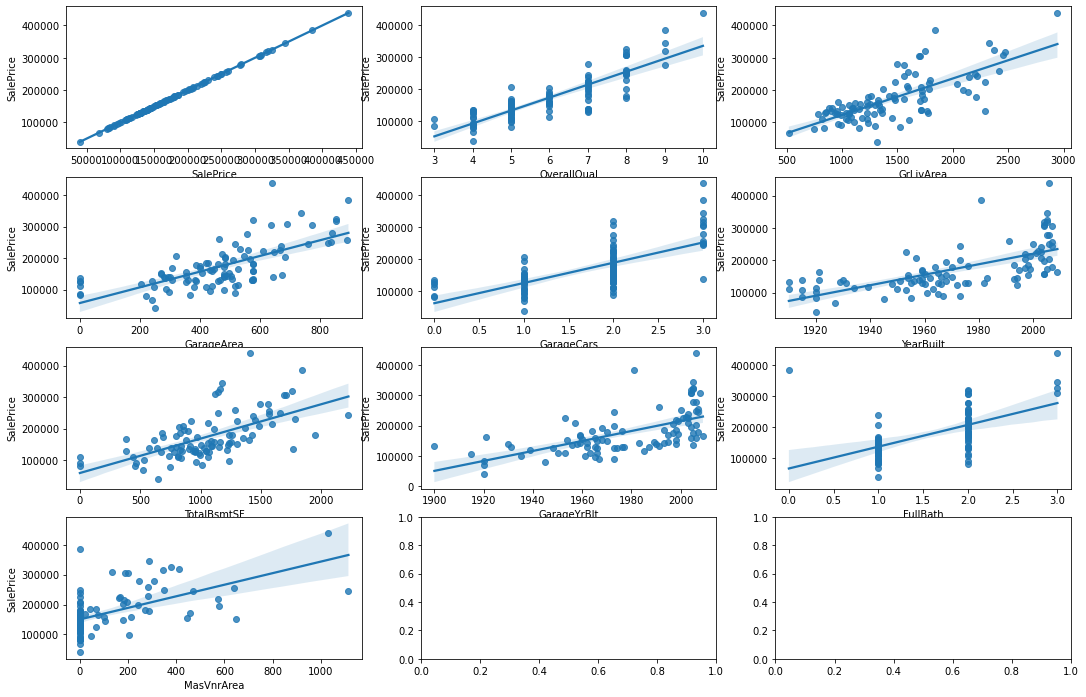

In [275]:
# Lets look at their distribution of features to analyze
fig, ax = plt.subplots(round(len(cols) / 3), 3, figsize = (18,12))

for i, ax in enumerate(fig.axes):
    if i < len(cols) - 1:
        sns.regplot(x=cols[i], y=Y, data=df_num[cols], ax=ax)

Getting the index of the top ten more correlated attributes with SalePrice

In [278]:
cols = corr_num['SalePrice'].sort_values(ascending=False)[0:11].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd'],
      dtype='object')

#### 3.2.2 Defining the independent variable X and seeing that attribute GarageYrBlt has null values

In [279]:
# pick out X cols and Y = SalePrice
X = df_data[cols]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     100 non-null    int64  
 1   OverallQual   100 non-null    int64  
 2   GrLivArea     100 non-null    int64  
 3   GarageArea    100 non-null    int64  
 4   GarageCars    100 non-null    int64  
 5   YearBuilt     100 non-null    int64  
 6   TotalBsmtSF   100 non-null    int64  
 7   GarageYrBlt   94 non-null     float64
 8   FullBath      100 non-null    int64  
 9   MasVnrArea    100 non-null    float64
 10  TotRmsAbvGrd  100 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 9.4 KB


Cleaning up null values from the top ten more correlated values. We need clean data and non null values to fit train our model.

In [280]:
df_data['GarageYrBlt'] = df_data['GarageYrBlt'].fillna(method = 'ffill').fillna(method = 'bfill')

In [281]:
X = df_data[cols]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     100 non-null    int64  
 1   OverallQual   100 non-null    int64  
 2   GrLivArea     100 non-null    int64  
 3   GarageArea    100 non-null    int64  
 4   GarageCars    100 non-null    int64  
 5   YearBuilt     100 non-null    int64  
 6   TotalBsmtSF   100 non-null    int64  
 7   GarageYrBlt   100 non-null    float64
 8   FullBath      100 non-null    int64  
 9   MasVnrArea    100 non-null    float64
 10  TotRmsAbvGrd  100 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 9.4 KB


Dropping SalePrice attribute from the dataframe that contains X values.

In [282]:
X = X.drop(['SalePrice'], axis=1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd
0,7,1710,548,2,2003,856,2003.0,2,196.0,8
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6
2,7,1786,608,2,2001,920,2001.0,2,162.0,6
3,7,1717,642,3,1915,756,1998.0,1,0.0,7
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9
...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0,6
96,7,1588,472,2,1999,1588,1999.0,2,183.0,6
97,4,960,432,1,1965,960,1965.0,1,48.0,6
98,5,835,366,1,1920,458,1920.0,1,0.0,5


#### 3.2.3 Defining the dependent variable Y with SalePrice values

In [283]:
Y = df_data['SalePrice']
Y

0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64

#### 3.2.4 Building the Linear Regression Model Group 1

For this section **sklearn** library will be implemented. sklearn implements the ordinary least squares Linear Regression.

Independent Variable X, contains the top ten correlated independent variables with SalePrice:
- OverallQual, 
- GrLivArea, 
- GarageArea, 
- GarageCars, 
- YearBuilt, 
- TotalBsmtSF, 
- GarageYrBlt, 
- FullBath, 
- MasVnrArea,
- TotRmsAbvGrd

In [284]:
# Printing independent variable values before fitting the algorithm
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd
0,7,1710,548,2,2003,856,2003.0,2,196.0,8
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6
2,7,1786,608,2,2001,920,2001.0,2,162.0,6
3,7,1717,642,3,1915,756,1998.0,1,0.0,7
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9
...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0,6
96,7,1588,472,2,1999,1588,1999.0,2,183.0,6
97,4,960,432,1,1965,960,1965.0,1,48.0,6
98,5,835,366,1,1920,458,1920.0,1,0.0,5


In [285]:
# Printing the dependent variable before fitting the algorithm
Y

0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64

Creating the algorithm function **myFirtsModel()**

In [301]:
def myFirstModel(X,Y):
    lr = linear_model.LinearRegression()
    model = lr.fit(X,Y)
    predictions = model.predict(X)
    return print(f"R^2 is: {model.score(X,Y)}") 
myFirstModel(X,Y)

R^2 is: 0.851578407441975


The model is reaching 85%. Which means that 85% of the SalePrice is predicted from the top ten more correlated attributes. Let's look a the prediction's scatter plot, ther is almost straigh line, which indicates that is a pretty good prediction and improved the one presented in class.

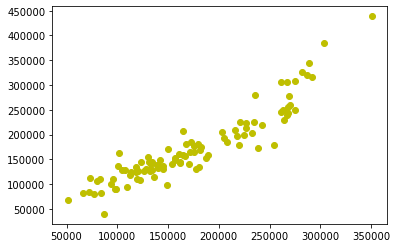

In [302]:
# Plotting predictions with SalePrice shows datapoints are drawing almost a perfect line.
plt.scatter(predictions, Y, color = 'y') 

The error Y - predictions should look like a normal distribution, and it looks like it in the image below

(array([ 2.,  4.,  7., 22., 29., 18.,  9.,  5.,  2.,  2.]),
 array([-74711.30459464, -58456.46643905, -42201.62828346, -25946.79012786,
         -9691.95197227,   6562.88618333,  22817.72433892,  39072.56249451,
         55327.40065011,  71582.2388057 ,  87837.07696129]),
 <BarContainer object of 10 artists>)

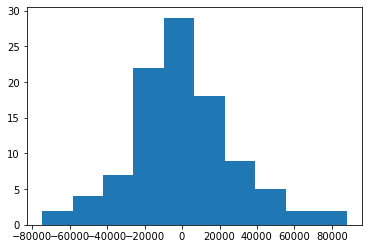

In [237]:
plt.hist(Y - predictions)

#### 3.2.5 Building the regression Model Group 2

In [307]:
cols2 = corr_num['SalePrice'].sort_values(ascending=False)[0:6].index
X2 = df_data[cols2]
X2 = X2.drop(['SalePrice'], axis=1)
myFirstModel(X2,Y)

R^2 is: 0.8309859964337735


The model is reaching 83%. Which means that 83% of the SalePrice is predicted from the top five more correlated attributes.

#### 3.2.6 Building the regression Model Group 3

In [308]:
cols3 = corr_num['SalePrice'].sort_values(ascending=False)[0:16].index
X3 = df_data[cols3]
X3 = X3.drop(['SalePrice'], axis=1)
myFirstModel(X3,Y)

R^2 is: 0.8822773084363211


The model is reaching 88%. Which means that 88% of the SalePrice is predicted from the top fifteen more correlated attributes.

[Back to top](#Index)

### 3.3 Results

What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.
 
I have three model groups:
1. Group 1, includes the top ten more correlated independent variable with SalePrice that reach a 85% accuracy predicting SalePrice.
2. Group 2, includes the top five more correlated independent variable with SalePrice that reach a 83% accuracy predicting SalePrice.
3. Group 3, includes the top fifteen more correlated independent variable with SalePrice that reach a 88% accuracy predicting SalePrice.

The model with fifteen more correlated independent variable with SalePrice predicted better the SalePrice prediction. This is because the model is using more independent variables. The more data we modeled and the more accurate are the predictions.


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

In [324]:
# we are goint to get the same columns
X = df_test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd
100,6,1610,480,2,1977,1610,1977.0,2,28.0,6
101,6,1732,476,2,1985,741,1985.0,2,336.0,7
102,5,1535,410,2,1979,0,1979.0,2,0.0,8
103,7,1226,740,3,2009,1226,2009.0,2,0.0,6
104,7,1818,240,1,1931,1040,1951.0,1,600.0,7
...,...,...,...,...,...,...,...,...,...,...
195,6,1456,440,2,1976,855,1976.0,2,0.0,7
196,7,1726,786,3,2007,1726,2007.0,2,205.0,8
197,8,3112,795,2,1918,1360,1918.0,2,0.0,8
198,6,2229,0,0,1912,755,NaN,1,0.0,8


In [325]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 100 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   100 non-null    int64  
 1   GrLivArea     100 non-null    int64  
 2   GarageArea    100 non-null    int64  
 3   GarageCars    100 non-null    int64  
 4   YearBuilt     100 non-null    int64  
 5   TotalBsmtSF   100 non-null    int64  
 6   GarageYrBlt   91 non-null     float64
 7   FullBath      100 non-null    int64  
 8   MasVnrArea    100 non-null    float64
 9   TotRmsAbvGrd  100 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 8.6 KB


In [326]:
# fixing the nulls
X = X.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(X.isnull().sum() !=0)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 100 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   100 non-null    int64  
 1   GrLivArea     100 non-null    int64  
 2   GarageArea    100 non-null    int64  
 3   GarageCars    100 non-null    int64  
 4   YearBuilt     100 non-null    int64  
 5   TotalBsmtSF   100 non-null    int64  
 6   GarageYrBlt   100 non-null    float64
 7   FullBath      100 non-null    int64  
 8   MasVnrArea    100 non-null    float64
 9   TotRmsAbvGrd  100 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 8.6 KB


In [329]:
# lets make predictions on the test data
myFirstModel(X,Y)

R^2 is: 0.824117152346634


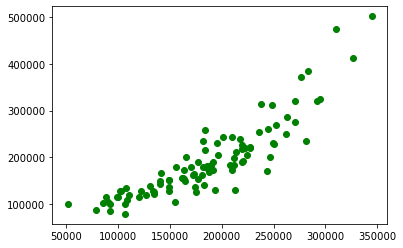

In [330]:
plt.scatter(predictions, Y, color = 'g')

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?

We conclude stating that we can achieve better accuracy predicting SalePrice when we use more independent variables correlated to the dependent variable. The three groups presented using the more correlated coefficient to SalePrice performed better when higher was the number of independent variables fitting the model. 

This is my first ML project using python and applying Linear Regression model. From my experience, I can say that spending time getting familiar with the data and making sure to have a clean dataset is the key to achieve better predictions.


[Back to top](#Index
)
## References

Add all references you used to complete this project.

- Yale, University. “Linear Regression.” Yale University, 2022. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm.

- Godard, Tuatini. “Detail exploratory data analysis with python” Kaggle, 2022 https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python/notebook

- Yiu, Tony. “What’s A Logarithm?” Medium. https://towardsdatascience.com/whats-a-logarithm-cca50d031241.

- Krystian, Marisa. “Scatter Plots Help the World Make Sense.” Data Visualization. Infogram, 2022. https://about.infogr.am/blog/scatter-plots/.
